In [1]:
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt

from rasterio.plot import show
from rasterio.mask import mask

from shapely.geometry import box

from fiona.crs import from_epsg # No
import pycrs # No

32000 x 20000 pxl
number of bands: 1
coord system: EPSG:31370
left: 130000.0 right: 162000.0
bottom: 198000.0 top: 218000.0


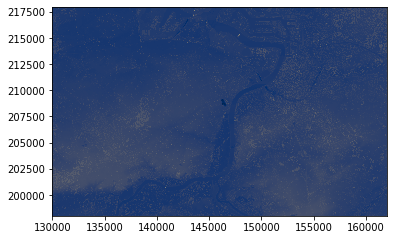

In [2]:
tif_path = "/home/becode/Projects/3D_House/LIDAR/k15/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif"
img = rio.open(tif_path) # open
print(f"{img.width} x {img.height} pxl")
print(f"number of bands: {img.count}")
print(f"coord system: {img.crs}")
print(f"left: {img.bounds.left} right: {img.bounds.right}\n"
    + f"bottom: {img.bounds.bottom} top: {img.bounds.top}")
show(img, cmap="cividis")#, cmap="bone") # plot

/home/becode/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


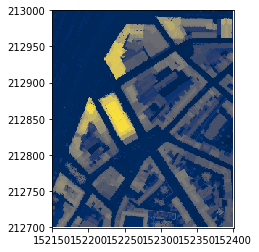

In [7]:
"""BEACON"""
left,right = 152150,152400
bottom,top = 212700,213000
bbox = box(left,bottom,right,top)
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=img.crs)
geo = geo.to_crs(crs=img.crs.data)

def get_features(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
coords = get_features(geo)

out_img, out_transform = mask(dataset=img, shapes=coords, crop=True)
out_meta = img.meta.copy()
epsg_code = int(img.crs.data['init'][5:])
out_meta.update({
    "driver": "GTiff",
    "height": out_img.shape[1],
    "width": out_img.shape[2],
    "transform": out_transform,
    "crs": img.crs
})
with rio.open("test.tif", "w", **out_meta) as dest:
    dest.write(out_img)
clipped = rio.open("test.tif")
show(clipped, cmap="cividis")

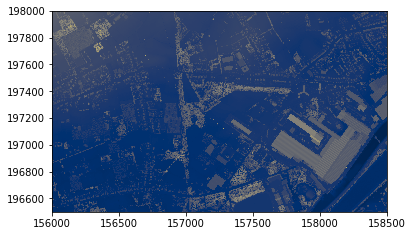

In [4]:
"""BOSSTRAAT"""
left,right = 156000,158500
bottom,top = 196500,198000
bbox = box(left,bottom,right,top)
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=img.crs)
geo = geo.to_crs(crs=img.crs.data)

def get_features(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
coords = get_features(geo)

out_img, out_transform = mask(dataset=img, shapes=coords, crop=True)
out_meta = img.meta.copy()
epsg_code = int(img.crs.data['init'][5:])
out_meta.update({
    "driver": "GTiff",
    "height": out_img.shape[1],
    "width": out_img.shape[2],
    "transform": out_transform,
    "crs": img.crs
})
with rio.open("test.tif", "w", **out_meta) as dest:
    dest.write(out_img)
clipped = rio.open("test.tif")
show(clipped, cmap="cividis")

In [ ]:
K14_15_16 = "DSM_ONLY"
coords = "Lambert 72"

K01_03 = "Top segment"
k04 = "Most west coast"
k05 = "Zeebrugge"
k06 = k05+"1"
k07 = "Schelden NOORD"
k08 = "Ant[..]Turn"
k09 = "Postel"
k10 = "NORTH EAST Lommel"
k11 = "Kust"
k12 = "Nieuwpoort - Ostende"

k14 = "North to Gent"
k15 = "Antwerpen"

k23 = "Mechelen Duffel "
k24 = "Aarschot"

print("END OF")

#geocode(query, *, limit=None, exactly_one=True, timeout=DEFAULT_SENTINEL)